In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [3]:
df.head

<bound method NDFrame.head of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease

In [4]:
df.shape

(918, 12)

In [5]:
df.isnull()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


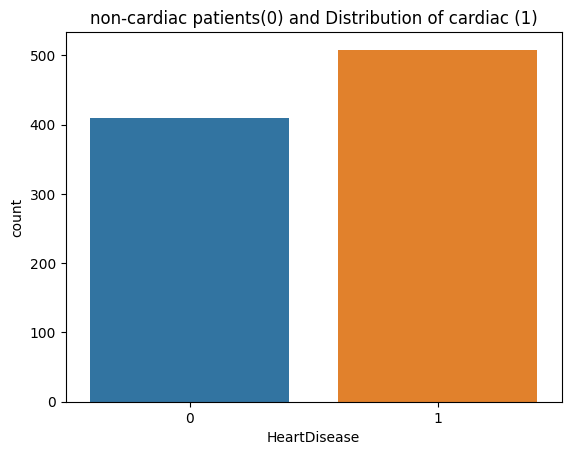

In [6]:
sns.countplot(data=df, x='HeartDisease')
plt.title("non-cardiac patients(0) and Distribution of cardiac (1)")
plt.show()

In [7]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [10]:
print(df_encoded.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [11]:
X=df_encoded.drop("HeartDisease",axis=1)
y=df_encoded["HeartDisease"]

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8858695652173914


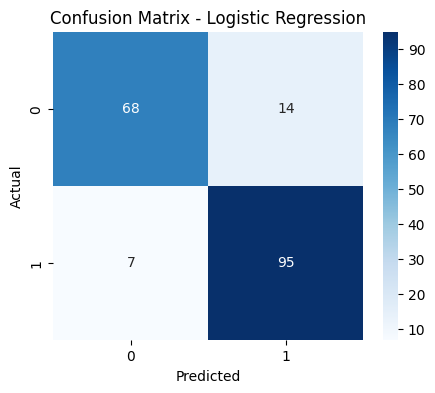

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [18]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



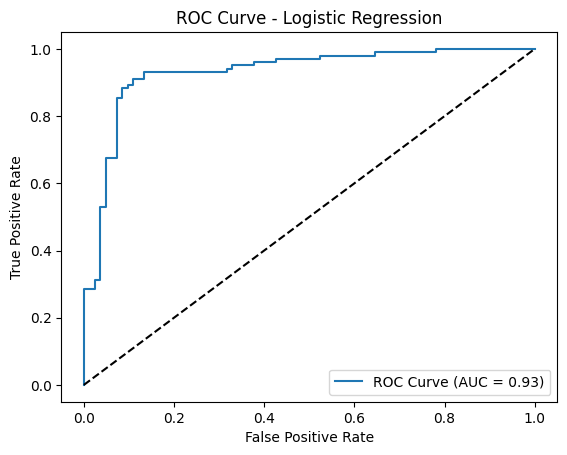

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]  # احتمال کلاس 1

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [20]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [21]:
y_pred = svm_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

SVM Accuracy: 0.9021739130434783


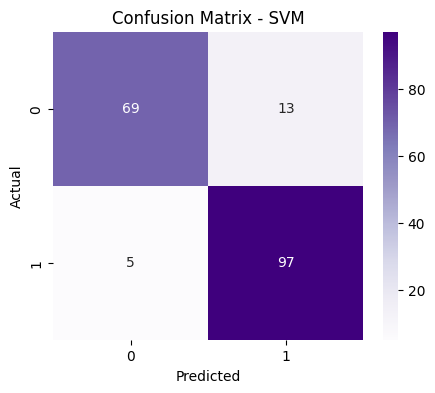

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Purples", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

In [24]:
from sklearn.metrics import classification_report

print("Classification Report for SVM:\n")
print(classification_report(y_test, y_pred))

Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        82
           1       0.88      0.95      0.92       102

    accuracy                           0.90       184
   macro avg       0.91      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



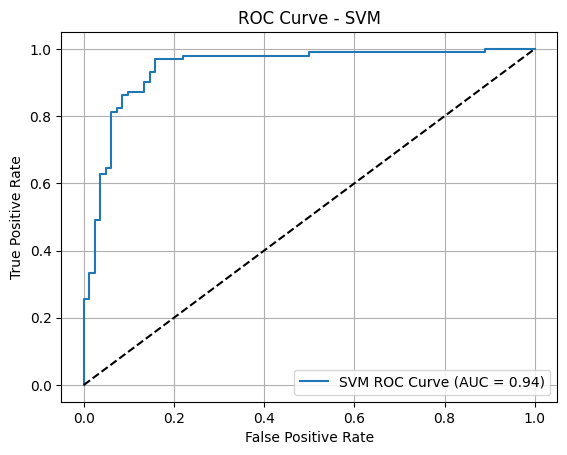

In [25]:
y_proba = svm_model.predict_proba(X_test)[:, 1]  # احتمال کلاس 1

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"SVM ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid()
plt.show()

***KNN***

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)


KNeighborsClassifier()

In [27]:
y_pred = knn_model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.8858695652173914


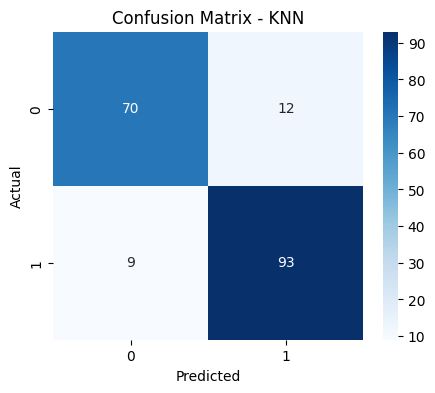

In [29]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

In [30]:
print("Classification Report for KNN:\n")
print(classification_report(y_test, y_pred))

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



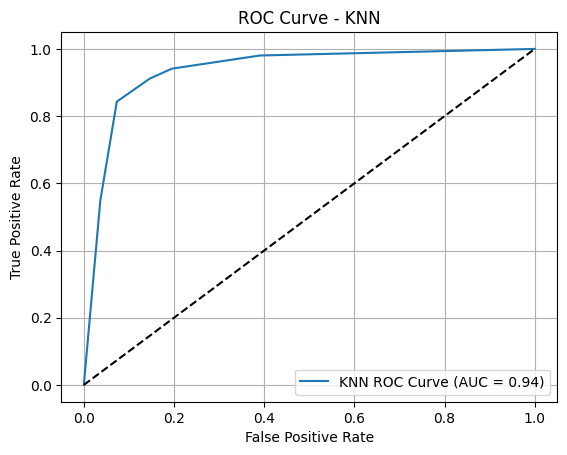

In [31]:
y_proba = knn_model.predict_proba(X_test)[:, 1]  # احتمال کلاس 1

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"KNN ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend()
plt.grid()
plt.show()

**Grid Search CV**

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [33]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'distance'}
Best cross-validation score: 0.8746062808685118


In [34]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print("Test set accuracy:", accuracy_score(y_test, y_pred))

Test set accuracy: 0.9021739130434783


**Cross Validation**

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)

In [37]:
scores = cross_val_score(log_model,X, y, cv=5, scoring='accuracy')

print("Cross Validation Accuracy for each fold:",scores)
print("Average Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross Validation Accuracy for each fold: [0.84782609 0.83695652 0.8423913  0.86885246 0.76502732]
Average Accuracy: 0.8322107388928487
Standard Deviation: 0.0352880505770244


**Cross Validation for Decision Tree**

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_scores = cross_val_score(dt_model , X, y, cv=5, scoring='accuracy')


print("Decision Tree Accuracy (5-fold):", dt_scores)
print("Average Accuracy:", dt_scores.mean())

Decision Tree Accuracy (5-fold): [0.75       0.77173913 0.77717391 0.68852459 0.67759563]
Average Accuracy: 0.7330066524114991


**Cross Validation for Random Forest**

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Random Forest Accuracy (5-fold):", rf_scores)
print("Average Accuracy:", rf_scores.mean())

Random Forest Accuracy (5-fold): [0.85869565 0.83152174 0.83695652 0.81420765 0.7431694 ]
Average Accuracy: 0.8169101924447613


**GricdSeachCV**

In [40]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring= 'accuracy')
grid_search.fit(X_train,y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation Score: 0.8623613829093282


**Feature Importance**

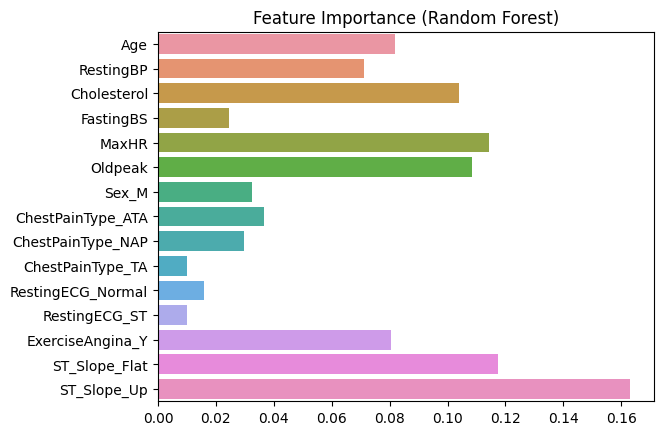

In [41]:
importances = best_rf.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

**Pipeline**

In [42]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('classifier', RandomForestClassifier(**grid_search.best_params_))
])

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)

Accuracy: 0.8858695652173914

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



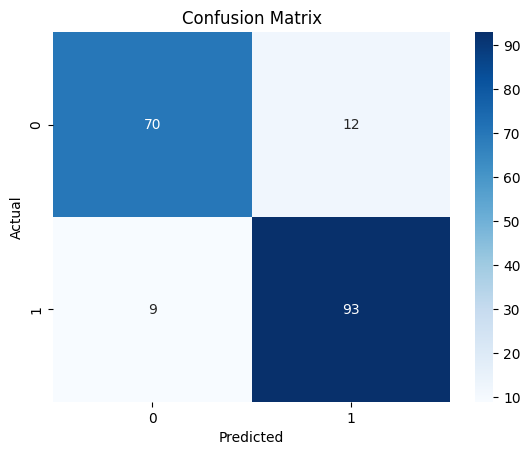

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_pipe))
print("\nClassification Report:\n", classification_report(y_test, y_pred_pipe))

sns.heatmap(confusion_matrix(y_test,y_pred_pipe), annot=True, cmap='Blues', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [44]:
import joblib

joblib.dump(pipeline, "heart_disease_model.pkl")

['heart_disease_model.pkl']